# 1. PRE-PROCESSING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import nltk
import nltk; nltk.download('popular')
import spacy
import matplotlib.pyplot as plt


%matplotlib inline

Mounted at /content/drive


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# convert the reddit ADHD dataset to a dataframe
# https://www.kaggle.com/datasets/jerseyneo/reddit-adhd-dataset The data can be found under this link
df = pd.read_csv('/content/drive/My Drive/MScProject/ADHD.csv', encoding='utf-8')

<ipython-input-5-e37de91eb85f>:3: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/MSc Project/ADHD.csv', encoding='utf-8')


Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
# drop the columns the topic model won't use - show only title, selftext, url and created_datetime

corpus = df[['title', 'selftext', 'url', 'created_datetime']]
corpus

,title,selftext,url,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",https://www.reddit.com/r/ADHD/comments/k348a/a...,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,http://www.utexas.edu/features/2011/08/29/adhd...,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,https://www.reddit.com/r/ADHD/comments/k6efi/a...,2011-09-06 13:53:11
...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52


In [ ]:
# drop any rows with missing values

corpus1 = corpus.dropna()
corpus1

,title,selftext,url,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",https://www.reddit.com/r/ADHD/comments/k348a/a...,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,2011-09-03 11:58:04
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,https://www.reddit.com/r/ADHD/comments/k6efi/a...,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",https://www.reddit.com/r/ADHD/comments/k7t0t/j...,2011-09-07 17:46:52
...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52


In [ ]:
# remove duplicates

corpus1 = corpus1.drop_duplicates()
corpus1

,title,selftext,url,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",https://www.reddit.com/r/ADHD/comments/k348a/a...,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,2011-09-03 11:58:04
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,https://www.reddit.com/r/ADHD/comments/k6efi/a...,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",https://www.reddit.com/r/ADHD/comments/k7t0t/j...,2011-09-07 17:46:52
...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52


In [ ]:
# join the columns for title and selftext, as this represents one post and the title of that post from a single user

cols = ['title', 'selftext']

corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corpus2 = corpus1.drop(columns=['title', 'selftext'])
print(corpus2)

                                                      url  \
0       https://www.reddit.com/r/ADHD/comments/k348a/a...   
1       https://www.reddit.com/r/ADHD/comments/k3gdz/d...   
3       https://www.reddit.com/r/ADHD/comments/k5fvd/w...   
4       https://www.reddit.com/r/ADHD/comments/k6efi/a...   
5       https://www.reddit.com/r/ADHD/comments/k7t0t/j...   
...                                                   ...   
336061  https://www.reddit.com/r/ADHD/comments/lhjs50/...   
336062  https://www.reddit.com/r/ADHD/comments/lhjvn6/...   
336063  https://www.reddit.com/r/ADHD/comments/lhk0yu/...   
336064  https://www.reddit.com/r/ADHD/comments/lhk0z8/...   
336065  https://www.reddit.com/r/ADHD/comments/lhk658/...   

           created_datetime                                   title + selftext  
0       2011-09-03 01:48:00  Android app to strengthen attention/focus Hey ...  
1       2011-09-03 11:58:04  Does anyone here have experience with Imiprami...  
3       2011-09-05 16:21

In [ ]:
# include 2018-2021, to be comparable with r/adhdwomen dataset

corpus3 = corpus2[(corpus2['created_datetime'] > '2018-01-01')]
corpus3

,url,created_datetime,title + selftext
96270,https://www.reddit.com/r/ADHD/comments/7nc4o4/...,2018-01-01 00:35:17,Taking my meds really feels like trading in ha...
96271,https://www.reddit.com/r/ADHD/comments/7nc6ua/...,2018-01-01 00:47:00,Taking my meds really feels like trading in ha...
96272,https://www.reddit.com/r/ADHD/comments/7nc8jv/...,2018-01-01 00:56:18,What do you prefer? Reading paperback/hardback...
96273,https://www.reddit.com/r/ADHD/comments/7ncaok/...,2018-01-01 01:07:23,Happy New Year? [removed]
96274,https://www.reddit.com/r/ADHD/comments/7ncgoq/...,2018-01-01 01:40:24,Two questions: what’s the smoothest methylphen...
...,...,...,...
336061,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40,Meds not working / lack of sleep to blame? Hi ...
336062,https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15,How to deal with friends who tell you to be ca...
336063,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50,"Atomoxetine side effects were too harsh, appre..."
336064,https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52,LTO3 experiences [removed]


In [ ]:
# remove any deleted posts for privacy reasons and removed posts as did not meet community guidelines (e.g. advertisements)

corpus4 = corpus3[~corpus3['title + selftext'].str.contains('deleted|removed|Survey', case=False)]
corpus5 = corpus4.drop(columns=['url', 'created_datetime'])
corpus5

,title + selftext
96271,Taking my meds really feels like trading in ha...
96272,What do you prefer? Reading paperback/hardback...
96275,Long term side effects of ADHD medication? Hey...
96276,My Whole Life I Have Never Considered the Poss...
96282,Got my Meds (Concerta 18mg) on Friday and Im t...
...,...
336057,I like watching movies with other people becau...
336059,Why do I overreact Had a fight. With someone w...
336061,Meds not working / lack of sleep to blame? Hi ...
336063,"Atomoxetine side effects were too harsh, appre..."


In [ ]:
# randomly sample the larger r/adhd dataset to the same number of posts in the smaller r/adhdwomen dataset

corpus5 = corpus5.sample(n=13541)
corpus5

,title + selftext
133044,Disappointed by cautious treatment I was diagn...
237178,What is it called when you have a ton of rando...
104369,Just found this subreddit. I’ve never actually...
128764,I’m ruining my own life. This might sound...
137656,Doing the Dishes: My Arch-Nemesis I just finis...
...,...
304608,Toddler ADHD Does anyone have experience toddl...
283870,Why is it easier for me to buy a gun than it i...
269702,Professors with ADHD - How do you do it? Quest...
290467,New major attention problems I am a 26-year-ol...


In [ ]:
# replace forwardslash with a space

corpus6 = corpus5.replace(to_replace='/', value=' ', regex=True)

In [ ]:
corpus6 = pd.read_csv('/content/drive/My Drive/MScProject/corpus7_ADHD.csv', encoding='utf-8')

In [ ]:
# remove: any characters that are not letters or numerical values, whitespace characters and punctuation

import re

def remove_punctuation_and_special_whitespace(text):
    punctuation_removed = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    punctuation_and_special_whitespace_removed = re.sub(r'[\s]', ' ', punctuation_removed)
    return punctuation_and_special_whitespace_removed

corpus6['title + selftext'] = corpus6['title + selftext'].apply(remove_punctuation_and_special_whitespace)

corpus6

,title + selftext
0,What am I supposed to do if ADHD exhausts me t...
1,I m having a bad night I m trying to do my hom...
2,Understanding Girls with ADHD Hi sorry for for...
3,Declining mental state I need help I m 19 alm...
4,Vyvanse and Coffee I usually have a cup of cof...
...,...
13531,Mood crashes when stresses are lifted Hi all ...
13532,Not being able to start is ruining my life I h...
13533,How do you separate the ADHD from the PTSD Tra...
13534,strattera Does the urinary retention and uri...


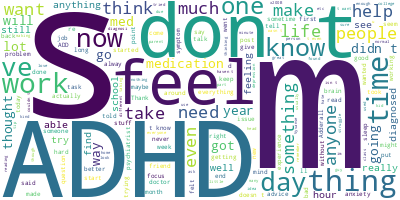

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(corpus6['title + selftext'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://nicharuc.github.io/topic_modeling/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://github.com/bhargavvader/personal/issues/5

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in corpus6['title + selftext']])

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [ ]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [ ]:
# Define stop word list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 'u', 's', 'day', 'everything', 'thing', 'www'])


# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [ ]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]

In [ ]:
# examples of bigrams
bigrams[:10]

['restrict sr',
 'flair 3A',
 'q flair',
 'search q',
 'executive dysfunction',
 'extended release',
 'Fast forward',
 'panic attacks',
 'blood pressure',
 'panic attack']

In [ ]:
# Concatenate n-grams
def replace_ngram(x):
    # for gram in trigrams:
    #     x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [ ]:
posts_w_ngrams = corpus6.copy()

In [ ]:
posts_w_ngrams['title + selftext'] = posts_w_ngrams['title + selftext'].map(lambda x: replace_ngram(x))

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess(row):
    # Create a string by concatenating all the values in the row
    concatenated_string = ' '.join(row.values.astype(str))
    # Lowercase
    lowercase_string = concatenated_string.lower()
    # Split into words
    lowercase_words = lowercase_string.split(' ')
    # Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'utm', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 'u', 'day', 'everything', 'thing', 'someone', 'life', 's', 'something',
                       'everything', 'thing', 'aaaaaaaaaaaaaaaaaaaaaaaa'])
    filtered_words = [word for word in lowercase_words if word not in stop_words and len(word) > 2]
    # Tokenize
    tokens = word_tokenize(' '.join(filtered_words))
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    # allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens

posts_w_ngrams['pre_processed'] = posts_w_ngrams[['title + selftext']].apply(preprocess, axis=1)
corpus7 = posts_w_ngrams.drop(columns=['title + selftext'])
print(corpus7)

                                           pre_processed
0      [supposed, exhaust, point, depressed, anxious,...
1      [bad, night, trying, homework, assignment, har...
2      [understanding, girl, sorry, formatting, mobil...
3      [declining, mental, state, help, almost, work,...
4      [vyvanse, coffee, usually, cup, coffee, every_...
...                                                  ...
13531  [mood, crash, stress, lifted, looking, advice,...
13532  [able, ruining, mini, job, whenever, clock, ho...
13533  [separate, ptsd, trauma, depression, anxiety, ...
13534  [strattera, urinary, retention, urinary, hesit...
13535  [people, lose, key, phone, wallet, time, godmo...

[13536 rows x 1 columns]


In [ ]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    return filtered

In [ ]:
corpus8 = corpus7['pre_processed'].map(noun_only)

In [ ]:
data = corpus8.values.tolist()
data_words = list(data)
print(data_words[:1][0][:30])

['point', 'week', 'exhaust', 'survive', 'trouble', 'way', 'way', 'cause', 'help', 'progress', 'knock', 'feel', 'society']


**Exploratory Data Analysis**

In [ ]:
post_length = [len(tokens) for tokens in corpus7['pre_processed']]

print(post_length)

post_length_df = pd.DataFrame(post_length, columns=['Post_length'])
post_length_df

[40, 25, 108, 40, 36, 52, 54, 17, 149, 90, 232, 147, 29, 118, 47, 76, 53, 53, 324, 17, 9, 146, 285, 73, 3, 71, 20, 107, 19, 35, 62, 155, 22, 18, 18, 59, 43, 243, 26, 102, 58, 120, 107, 56, 207, 10, 38, 110, 82, 80, 164, 146, 86, 36, 92, 17, 91, 31, 113, 21, 35, 96, 39, 39, 48, 74, 50, 60, 46, 24, 68, 14, 30, 102, 8, 17, 13, 128, 20, 44, 16, 34, 112, 38, 21, 11, 15, 34, 41, 6, 104, 34, 39, 12, 58, 34, 41, 52, 207, 41, 97, 69, 20, 31, 105, 38, 13, 106, 184, 9, 63, 102, 84, 268, 120, 10, 12, 45, 63, 42, 52, 41, 37, 72, 38, 16, 21, 32, 61, 17, 32, 130, 189, 31, 50, 31, 29, 26, 96, 158, 22, 62, 71, 57, 30, 36, 42, 31, 225, 41, 40, 199, 84, 33, 21, 33, 24, 235, 19, 135, 50, 60, 45, 79, 10, 149, 29, 41, 4, 67, 47, 149, 39, 15, 73, 166, 35, 55, 90, 18, 46, 94, 37, 20, 85, 23, 11, 9, 35, 11, 57, 19, 5, 45, 63, 36, 202, 83, 19, 31, 5, 49, 49, 49, 24, 158, 22, 43, 47, 46, 31, 109, 123, 59, 69, 80, 53, 49, 33, 167, 37, 24, 89, 190, 107, 181, 47, 23, 45, 40, 44, 44, 30, 57, 108, 32, 19, 53, 19, 205

,Post_length
0,40
1,25
2,108
3,40
4,36
...,...
13531,64
13532,54
13533,194
13534,9


In [ ]:
post_length_df.describe()

,Post_length
count,13536.000000
mean,65.995124
std,67.321354
min,1.000000
25%,27.000000
50%,47.000000
75%,81.000000
max,1587.000000


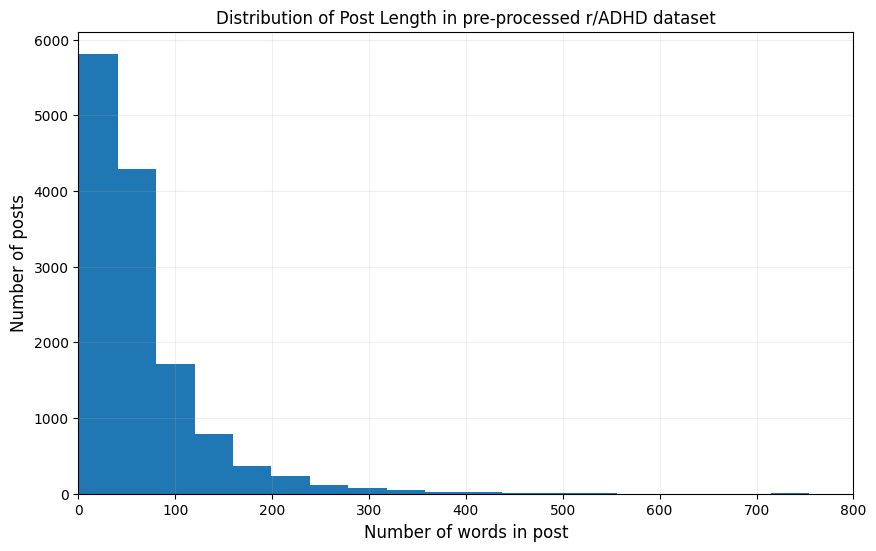

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


post_length_df.hist(bins=40, figsize=(10,6))
plt.title('Distribution of Post Length in pre-processed r/ADHD dataset', fontsize=12)
plt.xlabel('Number of words in post', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.grid(alpha=0.2)
plt.xlim(0,800)
plt.show()

# 2. MODELLING DATA

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
final_corpus = [id2word.doc2bow(text) for text in texts]
# View
print(final_corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1)]


In [ ]:
import gensim
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import numpy as np

topics = list(np.arange(5, 50, 10))

# compute coherence
model_coherence = []
for num_topics in topics:
    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=3, passes=40)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
    coherence_lda = coherence_model_lda.get_coherence()
    model_coherence.append(coherence_lda)


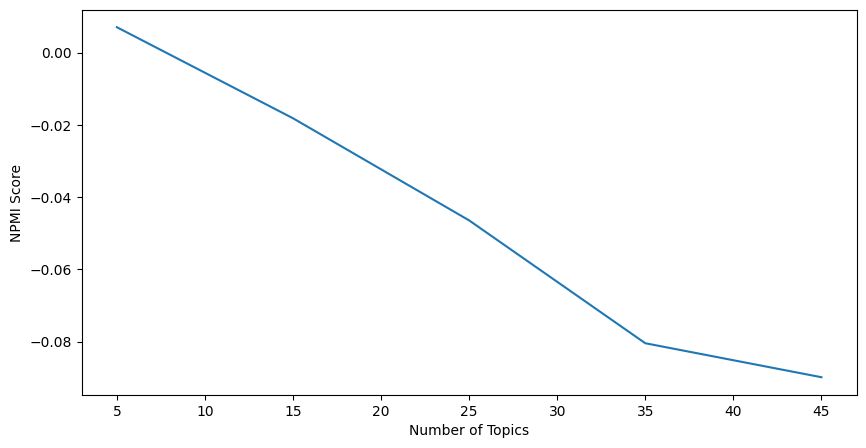

In [ ]:
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(5, 50, 10)),model_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("NPMI Score")
plt.show()

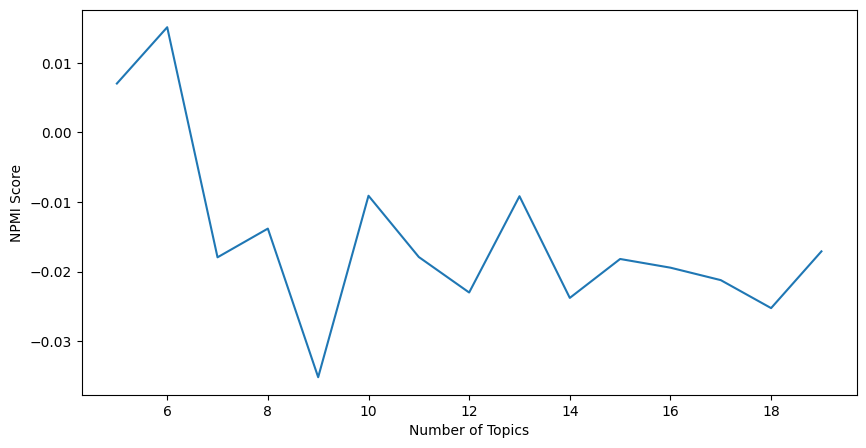

In [ ]:
import gensim
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import numpy as np

# compute coherence
model_coherence = []
for num_topics in range(5,20):
    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=3, passes=40)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
    coherence_lda = coherence_model_lda.get_coherence()
    model_coherence.append(coherence_lda)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(5,20),model_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("NPMI Score")
plt.show()

In [ ]:
import gensim
from gensim.models import CoherenceModel

lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=10, random_state=3, passes=40, alpha=0.05, eta=0.01)

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()

print(coherence_lda)

lda_model.show_topics(10, num_words=10, formatted=False)

inf


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)


[(0,
  [('feel', 0.045482367),
   ('time', 0.028263392),
   ('friend', 0.01897887),
   ('brain', 0.015043167),
   ('person', 0.014987875),
   ('talk', 0.014642126),
   ('problem', 0.014162781),
   ('conversation', 0.013145623),
   ('family', 0.012781413),
   ('help', 0.011702343)]),
 (1,
  [('car', 0.041763555),
   ('money', 0.03154047),
   ('month', 0.02724441),
   ('week', 0.021598462),
   ('pharmacy', 0.018663974),
   ('card', 0.017297825),
   ('list', 0.016535591),
   ('store', 0.015280333),
   ('pay', 0.014546937),
   ('phone', 0.013857805)]),
 (2,
  [('brain', 0.035897713),
   ('game', 0.03522861),
   ('music', 0.033663247),
   ('play', 0.020394923),
   ('video', 0.01588723),
   ('focus', 0.01576572),
   ('head', 0.014571074),
   ('movie', 0.014112507),
   ('hobby', 0.013611199),
   ('hand', 0.013259295)]),
 (3,
  [('medication', 0.05171143),
   ('feel', 0.034177866),
   ('work', 0.027774852),
   ('day', 0.027605),
   ('vyvanse', 0.027445225),
   ('week', 0.023760175),
   ('hour'

In [ ]:
import pickle

def save_model(model, file_path='lda_model.pkl'):
  with open(file_path, 'wb') as f:
    pickle.dump(model, f)
  return file_path

def load_model(file_path='lda_model.pkl'):
  with open(file_path, 'rb') as f:
    model = pickle.load(f)
  return model


In [ ]:
save_model(lda_model)

'lda_model.pkl'

In [ ]:
import gensim
from gensim.models import CoherenceModel

# compute coherence
num_topics = 6

lda_model_6 = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=3, passes=40, alpha=0.05, eta=0.01)
coherence_model_lda_6 = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda_6 = coherence_model_lda_6.get_coherence()

print('Coherence npmi score:', coherence_lda_6)

lda_model_6.show_topics(6, num_words=10, formatted=False)

Coherence npmi score: 0.025701742203284934


[(0,
  [('feel', 0.038572766),
   ('time', 0.027919801),
   ('friend', 0.017932547),
   ('person', 0.014604609),
   ('talk', 0.014188535),
   ('conversation', 0.013011581),
   ('family', 0.011828283),
   ('relationship', 0.011346424),
   ('brain', 0.01110675),
   ('hate', 0.010215167)]),
 (1,
  [('work', 0.074126564),
   ('job', 0.051532168),
   ('time', 0.028602954),
   ('week', 0.021445705),
   ('home', 0.021312863),
   ('month', 0.018560052),
   ('car', 0.014373489),
   ('money', 0.0142145865),
   ('hour', 0.013789882),
   ('office', 0.011898348)]),
 (2,
  [('time', 0.0354141),
   ('hour', 0.022222398),
   ('task', 0.016864201),
   ('brain', 0.016652469),
   ('work', 0.014369067),
   ('phone', 0.012277783),
   ('room', 0.011690732),
   ('game', 0.011389575),
   ('music', 0.010542382),
   ('minute', 0.010280649)]),
 (3,
  [('medication', 0.05121739),
   ('feel', 0.021980375),
   ('doctor', 0.0215504),
   ('month', 0.019341083),
   ('anxiety', 0.017818354),
   ('week', 0.017778117),
 

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [ ]:
import gensim
from gensim.models import CoherenceModel

# compute coherence
num_topics = 13

lda_model_13 = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=3, passes=40, alpha=0.05, eta=0.01)
coherence_model_lda_13 = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda_13 = coherence_model_lda_13.get_coherence()

print('Coherence npmi score:', coherence_lda_13)

lda_model_13.show_topics(13, num_words=10, formatted=False)

Coherence npmi score: 0.025701742203284934


[(0,
  [('test', 0.050564997),
   ('paper', 0.047907203),
   ('memory', 0.037629254),
   ('note', 0.023801234),
   ('tomorrow', 0.017059265),
   ('exam', 0.016771896),
   ('disability', 0.015780993),
   ('accommodation', 0.01531205),
   ('letter', 0.0152452765),
   ('study', 0.013275932)]),
 (1,
  [('list', 0.061893206),
   ('task', 0.04157288),
   ('month', 0.021284707),
   ('brand', 0.014606353),
   ('date', 0.014328686),
   ('name', 0.014130115),
   ('account', 0.01366279),
   ('boredom', 0.013527922),
   ('script', 0.012745843),
   ('system', 0.011080011)]),
 (2,
  [('music', 0.059686225),
   ('car', 0.04634857),
   ('money', 0.025683917),
   ('noise', 0.022023119),
   ('head', 0.021332912),
   ('drive', 0.021241758),
   ('card', 0.021018261),
   ('song', 0.017373707),
   ('pay', 0.012723594),
   ('bill', 0.012685297)]),
 (3,
  [('medication', 0.06533795),
   ('vyvanse', 0.027411267),
   ('week', 0.026942413),
   ('day', 0.02589942),
   ('feel', 0.025129884),
   ('work', 0.02505997

*Parameter tuning for alpha and beta values*

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                           id2word=id2word,
                                           num_topics=k,
                                           random_state=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')

    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm

corpus = final_corpus

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 7
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()

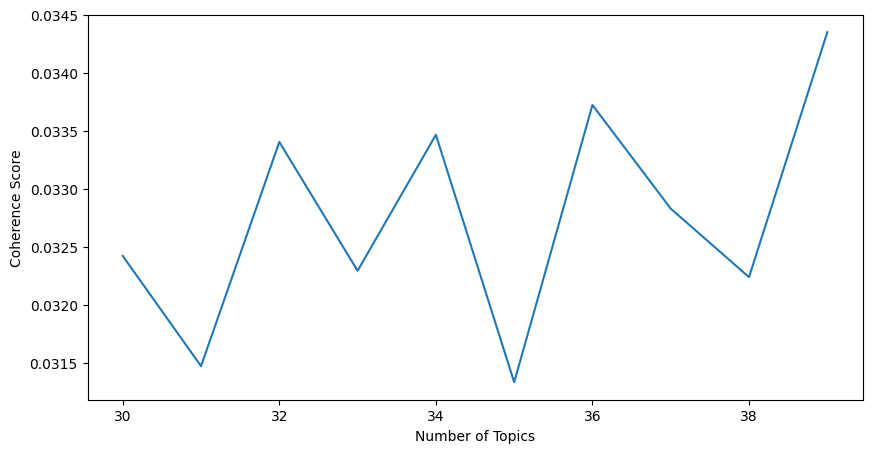

In [ ]:
# Experimenting with number of passes

from gensim.models import CoherenceModel
from matplotlib import pyplot as plt


# compute coherence
model_coherence = []
for passes in range(30,40):
    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=10, random_state=3, passes=passes)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
    coherence_lda = coherence_model_lda.get_coherence()
    model_coherence.append(coherence_lda)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(30,40),model_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")